In [66]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

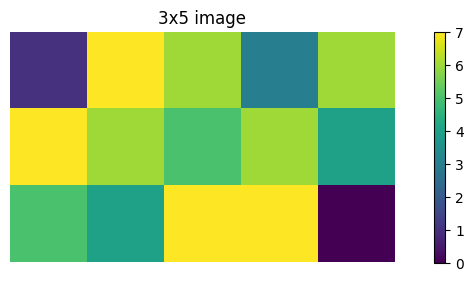

In [12]:
image = np.array([[1,7,6,3,6],
                  [7,6,5,6,4],
                  [5,4,7,7,0]])

plt.figure(figsize=(10,3))
plt.imshow(image)
plt.title("3x5 image")
plt.axis("off")
plt.colorbar()
plt.show()

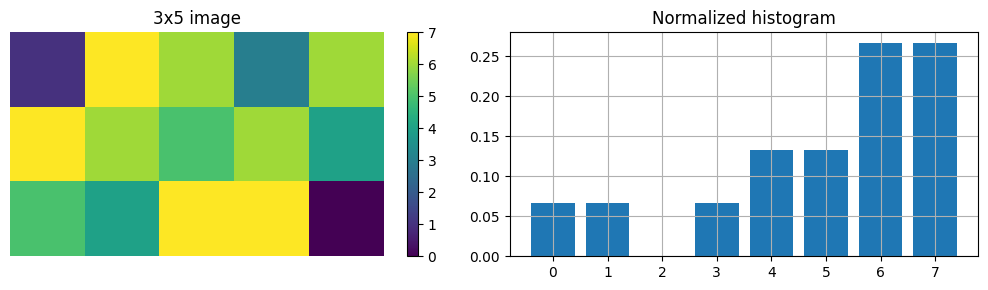

In [13]:
# manual histogram calculation
n_pix = np.size(image)
values_list = np.arange(0,8)
hist = np.zeros(np.size(values_list))
for k,value in enumerate(values_list):
    hist[k]=len(image[image == value])/n_pix

fig = plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("3x5 image")
plt.axis("off")
plt.colorbar()

plt.subplot(1,2,2)
plt.bar(values_list,hist)
plt.title("Normalized histogram")
plt.grid()

fig.tight_layout()
plt.show()

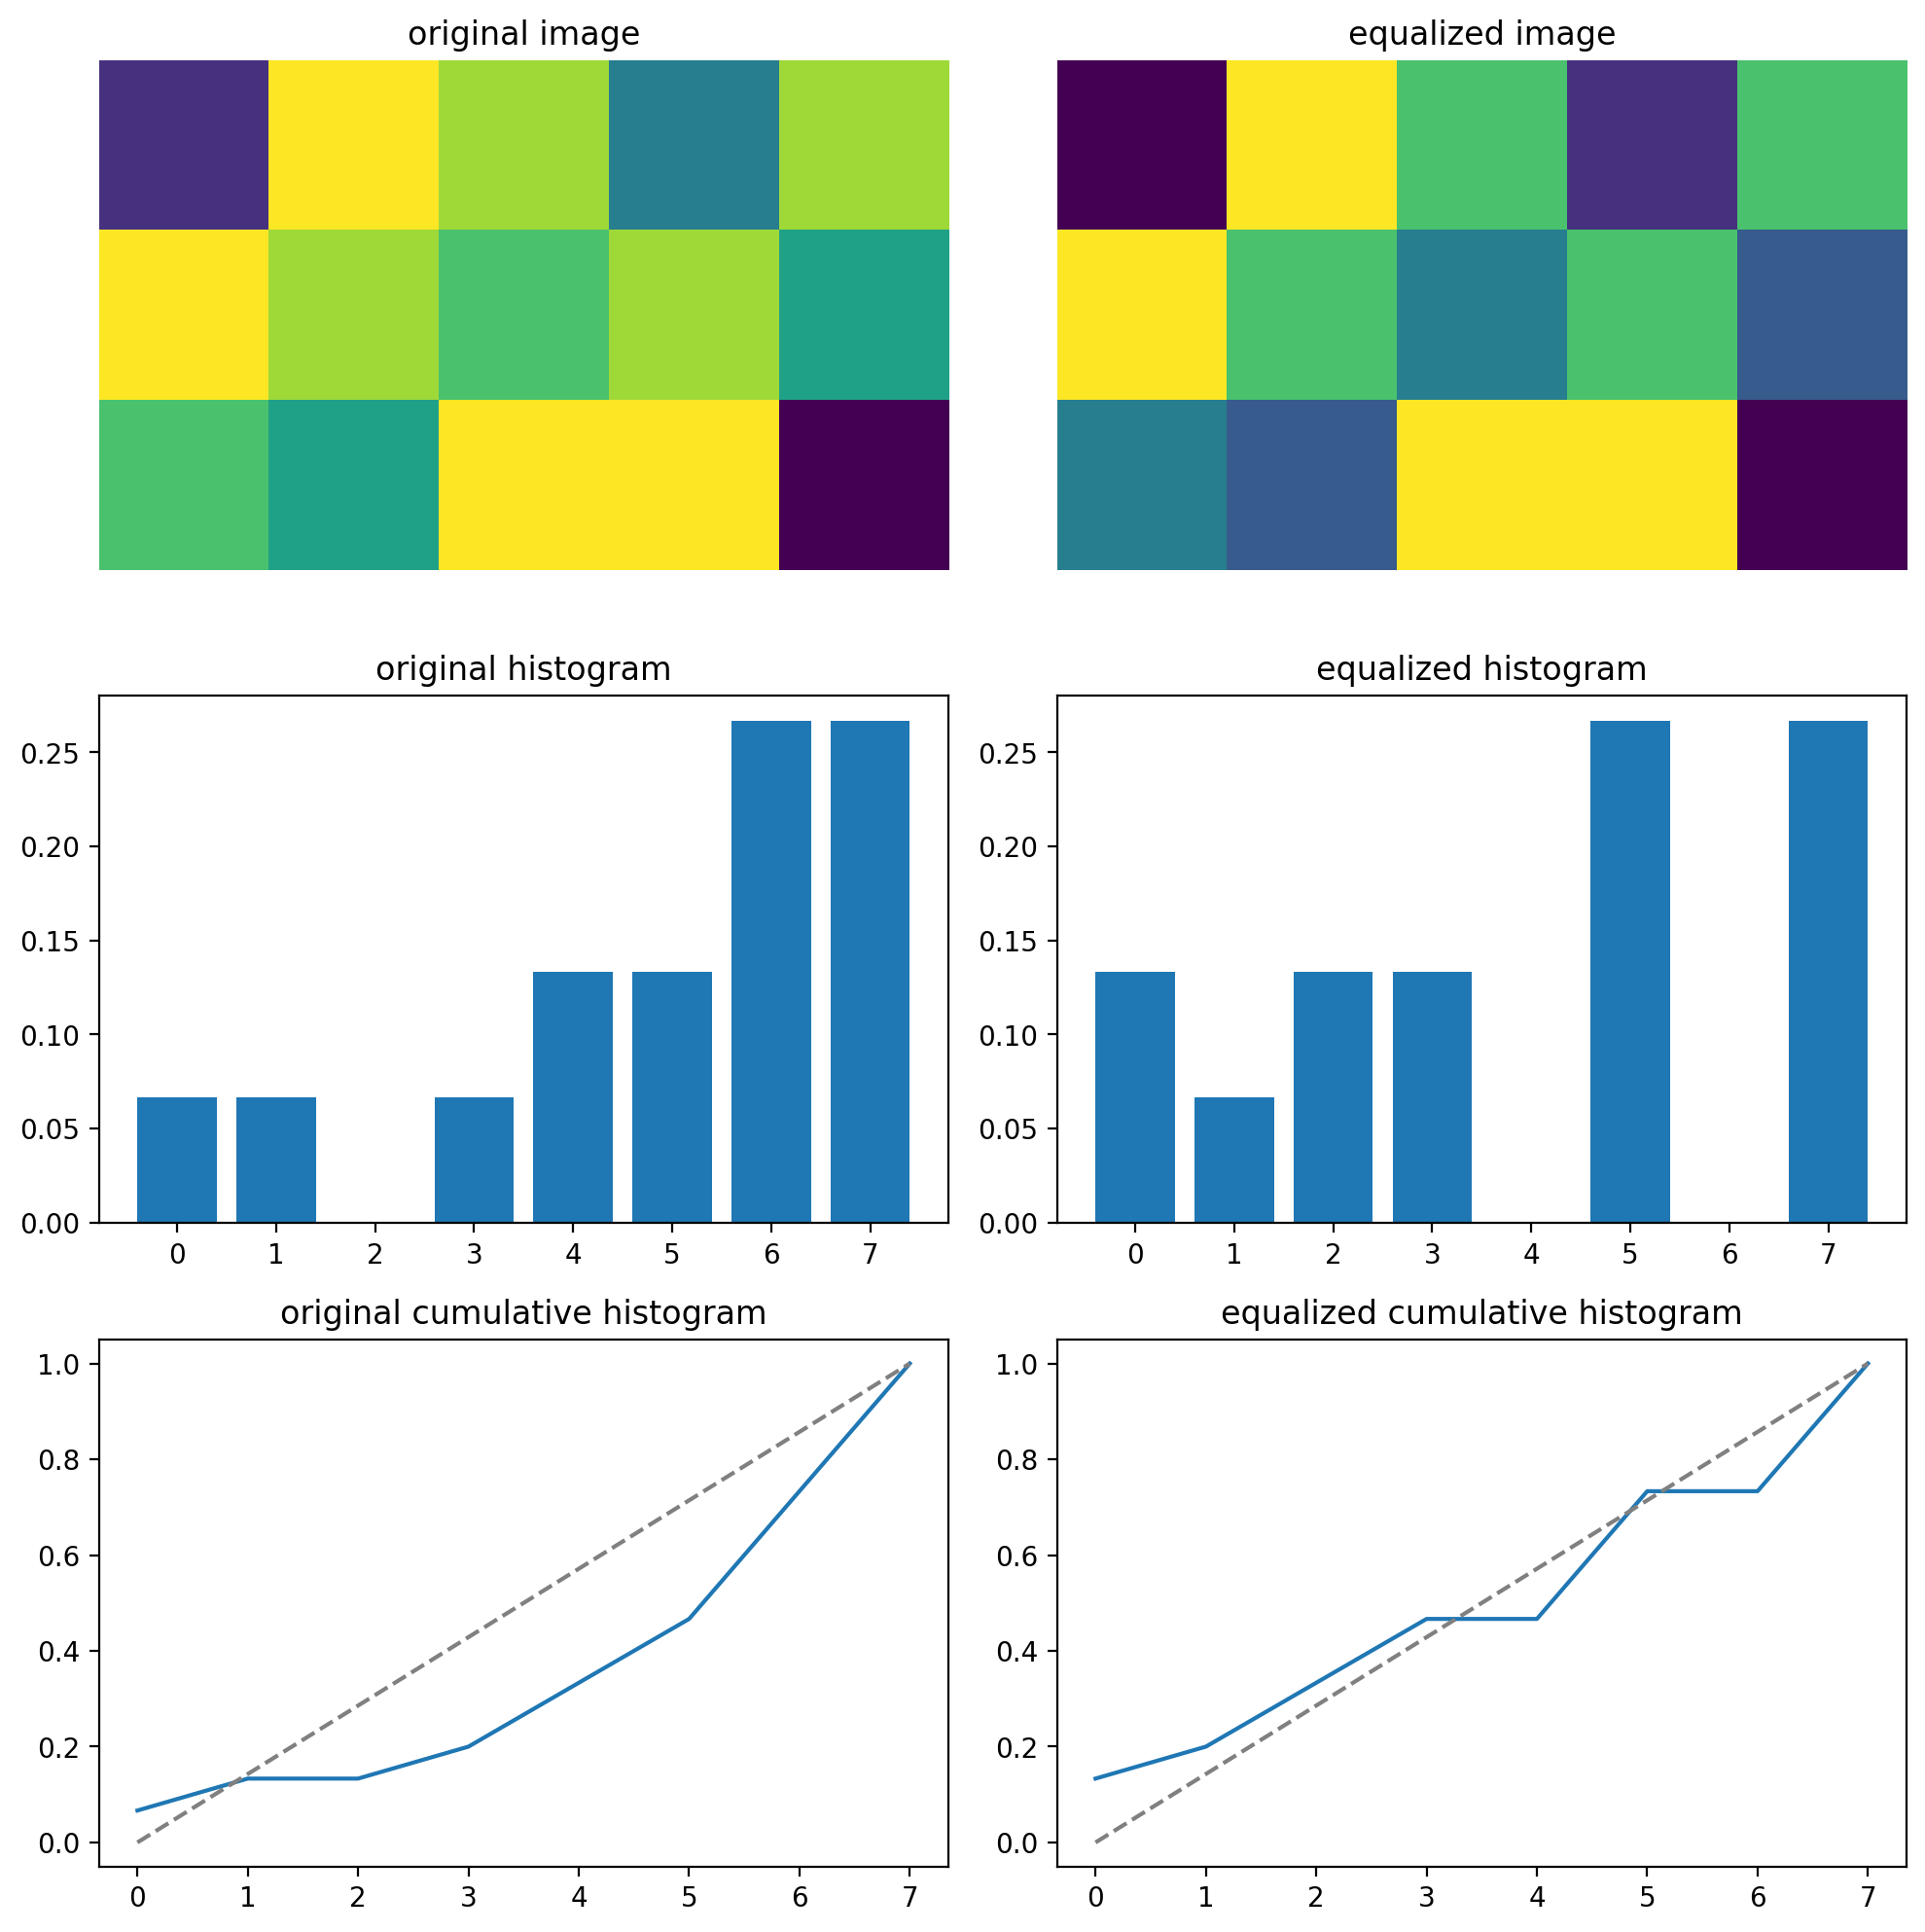

In [110]:
# Perform manual histogram equalization

cum_hist = np.cumsum(hist)          # get cumulated histogram
transform = np.floor(7*cum_hist)    # get transformed values

# apply transformation
equalized_image = image.copy()
for value in values_list:
    equalized_image[equalized_image==value] = transform[value]

# get equalized histogram
equalized_hist = np.zeros(np.size(values_list))
for k,value in enumerate(values_list):
    equalized_hist[k]=len(equalized_image[equalized_image == value])/n_pix

fig = plt.figure(figsize=(10,10),dpi=200)
plt.subplot(3,2,1)
plt.imshow(image)
plt.title("original image")
plt.axis("off")

plt.subplot(3,2,2)
plt.imshow(equalized_image)
plt.title("equalized image")
plt.axis("off")

plt.subplot(3,2,3)
plt.bar(values_list,hist)
plt.title("original histogram")

plt.subplot(3,2,4)
plt.bar(values_list,equalized_hist)
plt.title("equalized histogram")

plt.subplot(3,2,5)
plt.plot(values_list,cum_hist)
plt.plot(values_list,values_list/7,'--',c='gray')
plt.title("original cumulative histogram")


plt.subplot(3,2,6)
plt.plot(values_list,np.cumsum(equalized_hist))
plt.plot(values_list,values_list/7,'--',c='gray')
plt.title("equalized cumulative histogram")

fig.tight_layout()
plt.show()
    


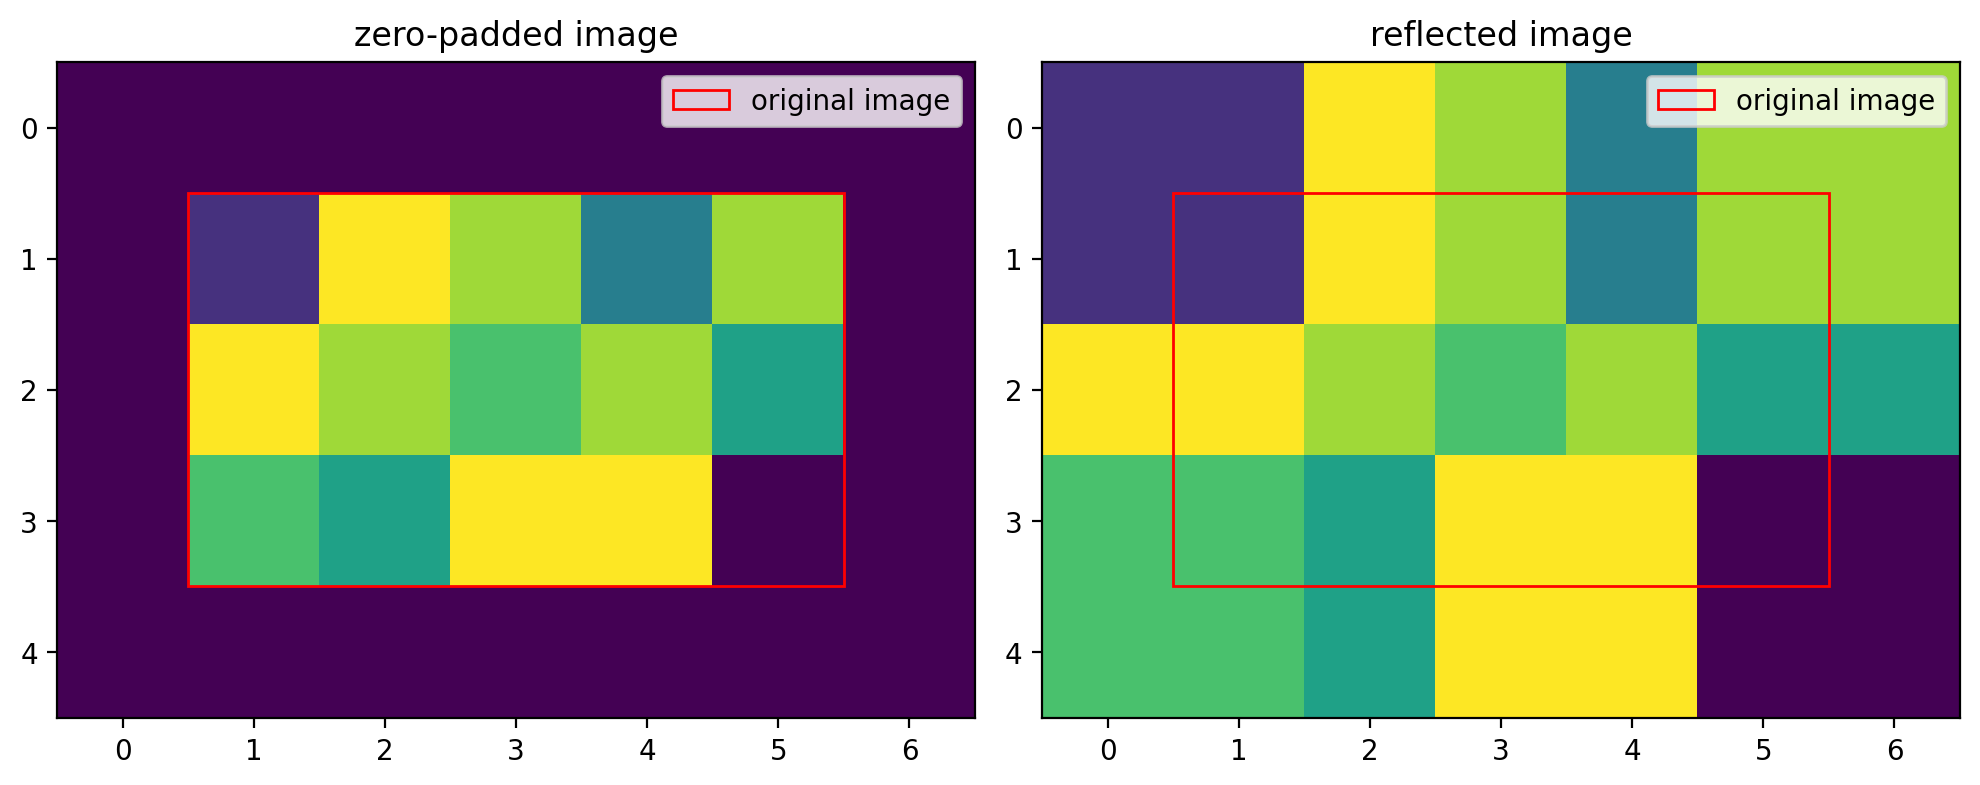

In [85]:
kernel = np.array([[1,0,-1],
                   [2,0,-2],
                   [1,0,-1]])

N,M = np.shape(image)       # image dimensions
n,m = np.shape(kernel)      # kernel dimensions

# create padded image with zeros
padded_image = np.zeros((N+2*(n//2), M+2*(m//2)))
np.shape(padded_image)
padded_image[n//2:n//2+N,m//2:m//2+M] = image

# plot settings and reflections
rect0 = patches.Rectangle((n//2-0.5,m//2-0.5),M,N,linewidth=1, edgecolor='r', facecolor='none',label = "original image")
rect1 = patches.Rectangle((n//2-0.5,m//2-0.5),M,N,linewidth=1, edgecolor='r', facecolor='none',label = "original image")

fig,axs = plt.subplots(figsize=(10,6),nrows=1,ncols=2,dpi=200)

axs[0].imshow(padded_image)
axs[0].add_patch(rect0); axs[0].legend()
axs[0].set_title("zero-padded image")


# make reflections
padded_image[0:n//2] = padded_image[n//2:n-n//2][::-1]          #top
padded_image[n//2+N:] = padded_image[N:N+n-2*(n//2)][::-1]      #bottom
padded_image[:,0:m//2] = padded_image[:,m//2:m-m//2][:,::-1]    #left
padded_image[:,M+m//2:] = padded_image[:,M:M+m-2*(m//2)][:,::-1]#right

axs[1].imshow(padded_image)
axs[1].add_patch(rect1); axs[1].legend()
axs[1].set_title("reflected image")
fig.tight_layout()
plt.show()


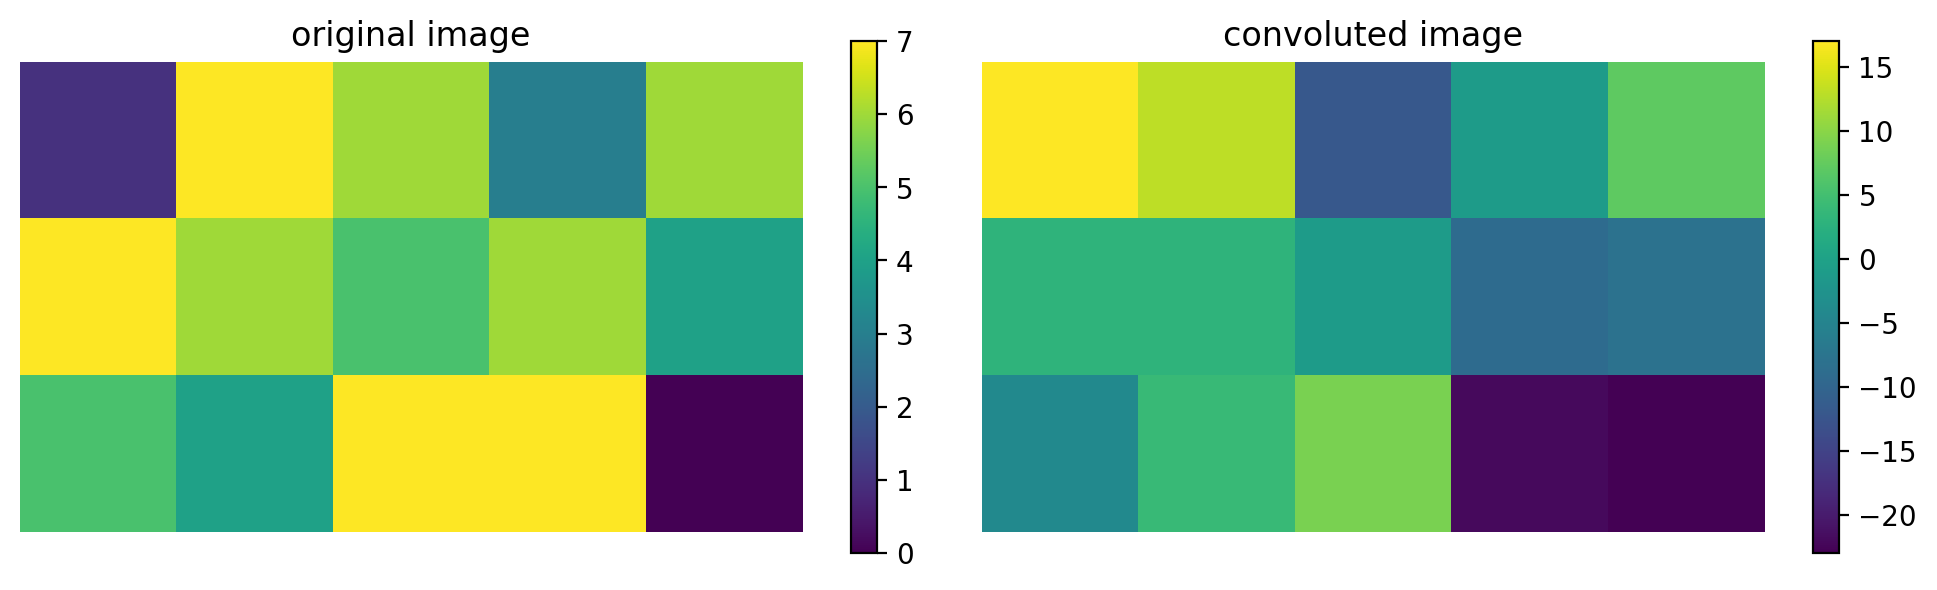

[[ 17.  13. -12.  -1.   7.]
 [  3.   3.  -1.  -9.  -8.]
 [ -4.   4.   9. -22. -23.]]


In [111]:
convoluted_image = np.zeros(np.shape(image))

# perform convolution (flip the kernel in both directions)
for row in range (N):
    for column in range(M):
        convoluted_image[row,column] = np.sum(np.multiply(kernel[::-1,::-1],
                                                          padded_image[row:row+n,column:column+m]))

# plot
fig = plt.figure(figsize=(10,3),dpi=200)
plt.subplot(1,2,1)
plt.imshow(image)
plt.colorbar(); plt.axis("off")
plt.title("original image")

plt.subplot(1,2,2)
plt.imshow(convoluted_image)
plt.colorbar(); plt.axis("off")
plt.title("convoluted image")
fig.tight_layout()
plt.show()

print(convoluted_image)

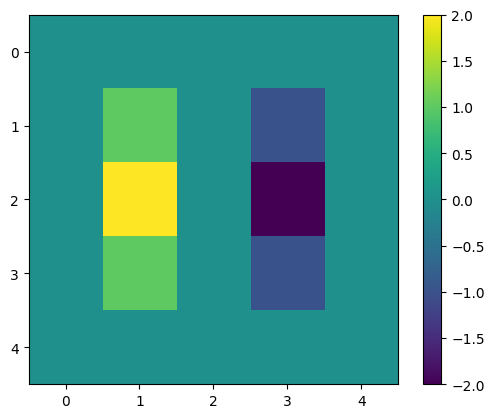

In [108]:
# this is just a test to check if the convolution operation is correct

test_img = np.zeros((7,7))
test_img[3,3] = 1

conv_test = np.zeros((5,5))
# perform convolution
for row in range (5):
    for column in range(5):
        conv_test[row,column] = np.sum(np.multiply(kernel[::-1,::-1],test_img[row:row+n,column:column+m]))

plt.imshow(conv_test)
plt.colorbar()